<a href="https://colab.research.google.com/github/nurin07/Data-Warehousing-and-Data-Mining/blob/main/Lab_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

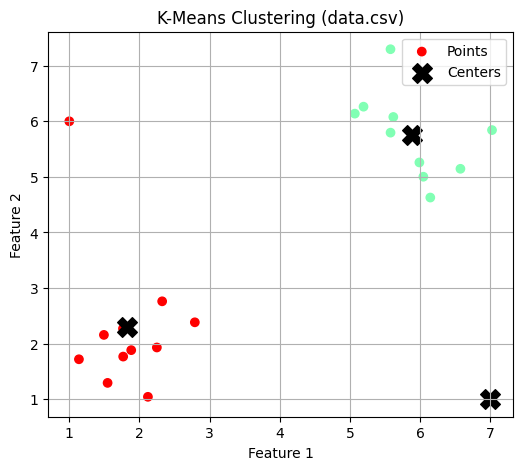

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")
X = data[['Feature_1', 'Feature_2']]

# K-Means Algorithm (from scratch)
def k_means(data, k, max_iter=100):
    data = data.to_numpy()
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, None] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Plotting function
def plot_clusters(data, clusters, centers, title):
    data = data.to_numpy()
    plt.figure(figsize=(6, 5))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', label="Points")
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=200, label="Centers")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and plot K-Means with k=3
k = 3
clusters, centroids = k_means(X, k)
plot_clusters(X, clusters, centroids, "K-Means Clustering (data.csv)")


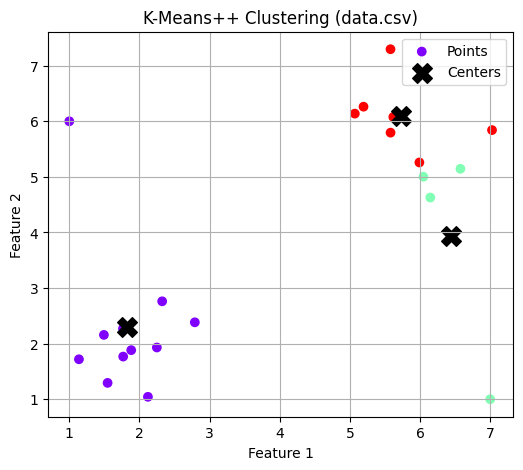

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")
X = data[['Feature_1', 'Feature_2']]

# K-Means++ initialization
def initialize_kmeans_plus_plus(data, k):
    data = data.to_numpy()
    np.random.seed(42)
    centroids = [data[np.random.randint(len(data))]]

    for _ in range(1, k):
        distances = np.min([np.linalg.norm(data - c, axis=1)**2 for c in centroids], axis=0)
        probs = distances / distances.sum()
        next_centroid = data[np.random.choice(len(data), p=probs)]
        centroids.append(next_centroid)

    return np.array(centroids)

# K-Means++ clustering
def k_means_plus_plus(data, k, max_iter=100):
    data_np = data.to_numpy()
    centroids = initialize_kmeans_plus_plus(data, k)

    for _ in range(max_iter):
        distances = np.linalg.norm(data_np[:, None] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data_np[clusters == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

# Plotting function
def plot_clusters(data, clusters, centers, title):
    data = data.to_numpy()
    plt.figure(figsize=(6, 5))
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', label="Points")
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=200, label="Centers")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run and plot K-Means++ with k=3
k = 3
clusters_pp, centroids_pp = k_means_plus_plus(X, k)
plot_clusters(X, clusters_pp, centroids_pp, "K-Means++ Clustering (data.csv)")


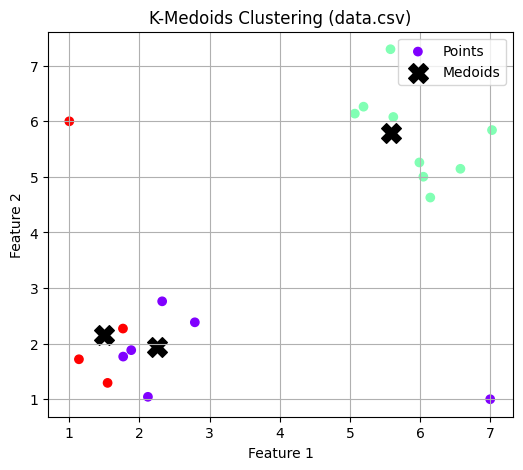

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("data.csv")
X = data[['Feature_1', 'Feature_2']].to_numpy()

# Manhattan distance function
def manhattan_distance(a, b):
    return np.abs(a - b).sum(axis=1)

# K-Medoids algorithm
def k_medoids(X, k, max_iter=100):
    np.random.seed(42)
    n_samples = X.shape[0]

    # Step 1: Randomly initialize medoid indices
    medoid_indices = np.random.choice(n_samples, k, replace=False)
    medoids = X[medoid_indices]

    for iteration in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        labels = np.argmin([manhattan_distance(X, m) for m in medoids], axis=0)

        # Step 3: Recalculate medoids
        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            # Find the point minimizing total distance to other points in the cluster
            distances = np.sum(np.abs(cluster_points[:, None] - cluster_points), axis=2)
            new_medoid = cluster_points[np.argmin(distances.sum(axis=1))]
            new_medoids.append(new_medoid)

        new_medoids = np.array(new_medoids)
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

# Plotting function
def plot_medoids(X, labels, medoids, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', label="Points")
    plt.scatter(medoids[:, 0], medoids[:, 1], marker='X', s=200, c='black', label='Medoids')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run K-Medoids
k = 3
labels, medoids = k_medoids(X, k)
plot_medoids(X, labels, medoids, "K-Medoids Clustering (data.csv)")


Estimated number of clusters: 1
Estimated number of noise points: 15


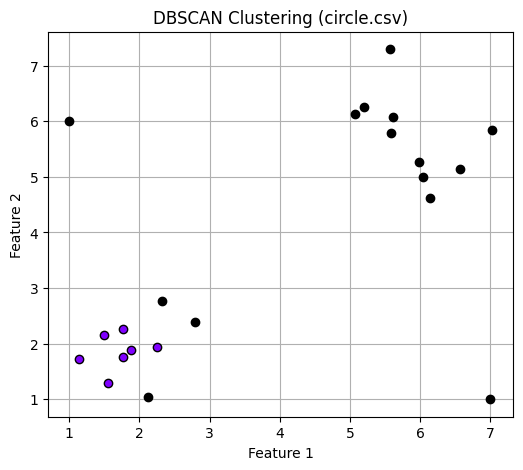

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("/content/data.csv")
X = data[['Feature_1', 'Feature_2']].values

# Normalize features (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
# eps: max distance between points in a neighborhood
# min_samples: min number of points in a cluster
db = DBSCAN(eps=0.3, min_samples=5).fit(X_scaled)
labels = db.labels_

# Number of clusters in labels (excluding noise if present)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Plot results
plt.figure(figsize=(6, 5))
unique_labels = set(labels)
colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color), markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering (circle.csv)')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Cluster labels assigned to each point:
[5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 6 4]


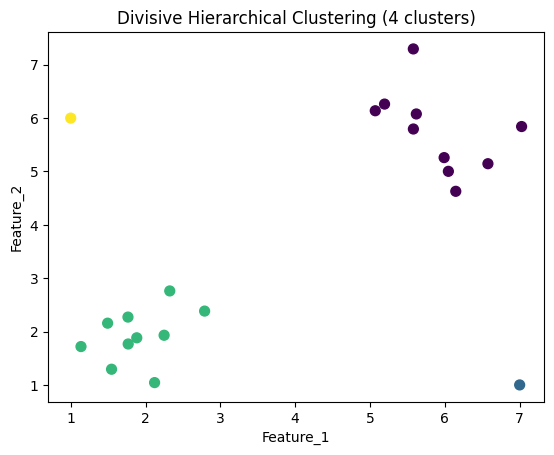

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data (comma-separated)
df = pd.read_csv('data.csv')  # Default sep=','

data = df.values

def divisive_clustering(data, max_clusters=4):
    clusters = {0: data}
    cluster_labels = np.zeros(len(data), dtype=int)
    current_cluster_count = 1

    while current_cluster_count < max_clusters:
        max_var = -1
        cluster_to_split = None
        for cl_id, points in clusters.items():
            if len(points) < 2:
                continue
            var_sum = points.var(axis=0).sum()
            if var_sum > max_var:
                max_var = var_sum
                cluster_to_split = cl_id

        if cluster_to_split is None:
            break

        points_to_split = clusters[cluster_to_split]
        kmeans = KMeans(n_clusters=2, random_state=42).fit(points_to_split)
        labels = kmeans.labels_

        new_cluster_id_1 = max(clusters.keys()) + 1
        new_cluster_id_2 = new_cluster_id_1 + 1

        clusters[new_cluster_id_1] = points_to_split[labels == 0]
        clusters[new_cluster_id_2] = points_to_split[labels == 1]
        del clusters[cluster_to_split]

        # Reset all labels
        cluster_labels[:] = -1
        for cl_id, pts in clusters.items():
            for pt in pts:
                idx = np.where((data == pt).all(axis=1))[0]
                for i in idx:
                    cluster_labels[i] = cl_id

        current_cluster_count = len(clusters)

    return cluster_labels

labels = divisive_clustering(data, max_clusters=4)

print("Cluster labels assigned to each point:")
print(labels)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Divisive Hierarchical Clustering (4 clusters)')
plt.show()


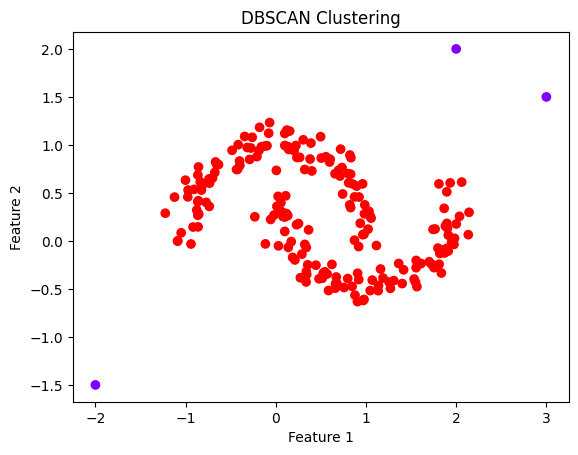

,Feature_1,Feature_2,Cluster
0,-1.049426,0.084443,0
1,0.922818,0.457489,0
2,0.656787,0.699597,0
3,1.188940,-0.386528,0
4,0.289265,-0.137745,0


In [13]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/data2.csv')

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Add cluster info to data
data['Cluster'] = clusters

# Visualize (if 2D)
if data.shape[1] == 3:
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='rainbow')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# View output
data.head()


In [17]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset
data = pd.read_csv('/content/data3.csv')

# Drop any unnamed index columns if present
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate Z-scores
z_scores = np.abs(zscore(numeric_data))

# Define threshold
threshold = 3

# Identify rows where any column exceeds the Z-score threshold
outliers = (z_scores > threshold).any(axis=1)

# Add result to original dataframe
data['Z_Outlier'] = outliers

# Show result
print(data)
print("\nTotal Z-score Outliers Detected:", data['Z_Outlier'].sum())


    Value  Z_Outlier
0    1.00      False
1    2.00      False
2    3.00      False
3    4.00      False
4   10.00      False
5    4.50      False
6  -10.00      False
7    2.50      False
8   -1.50      False
9   -1.01      False
10  -0.50      False
11   0.50      False
12   6.50      False
13   8.90      False
14 -20.00      False

Total Z-score Outliers Detected: 0


In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/data3.csv')

# Remove unwanted unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Create a Series to hold outlier flags
iqr_outliers = pd.Series([False] * len(data), index=data.index)

# Apply IQR method to each column
for col in numeric_data.columns:
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mark as outlier if value is outside IQR bounds
    iqr_outliers |= (numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)

# Add IQR outlier results to the main DataFrame
data['IQR_Outlier'] = iqr_outliers

# Show the result
print(data)
print("\nTotal IQR Outliers Detected:", data['IQR_Outlier'].sum())


    Value  IQR_Outlier
0    1.00        False
1    2.00        False
2    3.00        False
3    4.00        False
4   10.00        False
5    4.50        False
6  -10.00         True
7    2.50        False
8   -1.50        False
9   -1.01        False
10  -0.50        False
11   0.50        False
12   6.50        False
13   8.90        False
14 -20.00         True

Total IQR Outliers Detected: 2


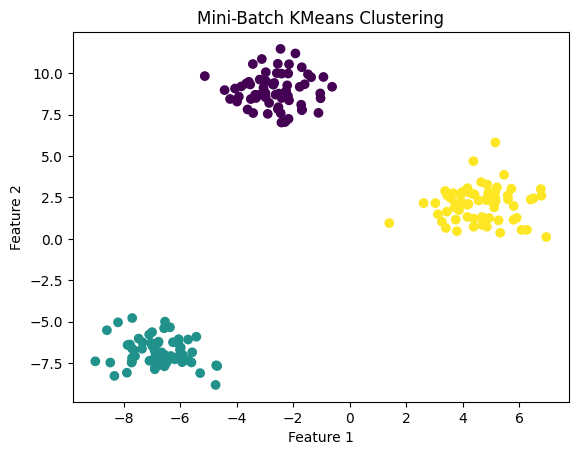

,Feature_1,Feature_2,Cluster
0,6.505653,2.447003,2
1,-5.128943,9.836189,0
2,-6.891874,-7.777364,1
3,-8.327712,-8.287573,1
4,-7.468992,-6.030507,1


In [16]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/data4.csv')

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Fit MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=20, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster column
data['Cluster'] = clusters

# Visualize (if 2D)
if data.shape[1] == 3:
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis')
    plt.title('Mini-Batch KMeans Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# View output
data.head()
